```shell
cd ~/link/res_publish/run/plot
conda activate
jupyter nbconvert pdf_*.ipynb --to python

conda activate publish
nohup python pdf_LC.py True csMAHN > /dev/null &

rm pdf_*.py

conda activate
echo 'finish'

jobs

```

In [1]:
from init_plot import *

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-18 00:11:37.193138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------func_help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache, p_pdf
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    get_adata_umap
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



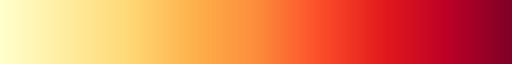

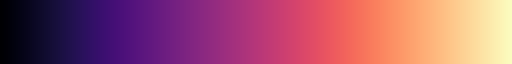

In [2]:
item = 'LC'

model = 'csMAHN'
if sys.argv[1] == 'True':
    model = sys.argv[2]
assert model in 'Seurat,came,csMAHN,SAMap'.split(
    ','), '[Error] Invalid modle "{}"'.format(model)

df_para = pd.read_csv(p_cache.joinpath(
    'parameter_{}.csv'.format(item)
))
df_para['path_ref'] = df_para['path_ref'].apply(
    lambda x: p_cache.joinpath(x))
df_para['path_que'] = df_para['path_que'].apply(
    lambda x: p_cache.joinpath(x))

display(cm, cm_2)

# get res info

In [3]:
df = get_test_result_df(p_res)
df = df.query("tissue == '{}'".format(item))

df['time_tag'] = df['name'].str.extract(
    ';(\\d{6}-\\d{4})$', expand=False).fillna('')
df = df[df['time_tag'].str.len() == 0]
df = df.drop(columns=['time_tag'])

df['tag'] = df['name_ref'].apply(lambda x: x[3:])

df['epochs'] = df['resdir_tag'].str.extract(
    "epochs=(\\d+)", expand=False).fillna('')
df['epochs'] = df['epochs'].mask(
    df['tag'] != 'all', '').mask(
        df['model'] == 'Seurat', '')
df = df.query("not (tag == 'all' & epochs == '500')")
df_varmap = df.apply(
    lambda row: '{model};{tag}'.format(
        **row), axis=1)
assert df_varmap.is_unique, '[isnot unique]'
df.index = df_varmap
del df_varmap

df['F1-score'] = df.apply(get_res_stat,
                          key='F1-score',
                          q="dataset_type == 'que'",
                          axis=1)
df['Accuracy'] = df.apply(
    get_res_stat, key='Accuracy',
    q="dataset_type == 'que'",
    axis=1)

df


[extract]
^(?P<tissue>.+)_(?P<sp_ref>.+)-corss-(?P<sp_que>.+);(?P<model>came|csMAHN|Seurat|SAMap);(?P<name_ref>[\w-]+)-map-(?P<name_que>[[\w-]+);?(?P<resdir_tag>.+)?$


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/pandas/core/strings/accessor.py:2738: FutureWarning: Possible nested set at position 127
  regex = re.compile(pat, flags=flags)


,dir,name,tissue,sp_ref,sp_que,model,name_ref,name_que,resdir_tag,tag,epochs,F1-score,Accuracy
SAMap;Neu,/public/workspace/licanchengup/link/res_publis...,LC_h-corss-m;SAMap;LChNeu-map-LCmNeu;is_1v1=False,LC,h,m,SAMap,LChNeu,LCmNeu,is_1v1=False,Neu,,0.562621,0.576120
SAMap;DCs,/public/workspace/licanchengup/link/res_publis...,LC_h-corss-m;SAMap;LChDCs-map-LCmDCs;is_1v1=False,LC,h,m,SAMap,LChDCs,LCmDCs,is_1v1=False,DCs,,0.682498,0.653251
came;all,/public/workspace/licanchengup/link/res_publis...,LC_h-corss-m;came;LChall-map-LCmall;epochs=300...,LC,h,m,came,LChall,LCmall,epochs=300;is_1v1=False,all,300,0.961407,0.962830
Seurat;Mono,/public/workspace/licanchengup/link/res_publis...,LC_h-corss-m;Seurat;LChMono-map-LCmMono;is_1v1...,LC,h,m,Seurat,LChMono,LCmMono,is_1v1=True,Mono,,0.090262,0.210117
Seurat;DCs,/public/workspace/licanchengup/link/res_publis...,LC_h-corss-m;Seurat;LChDCs-map-LCmDCs;is_1v1=True,LC,h,m,Seurat,LChDCs,LCmDCs,is_1v1=True,DCs,,0.687628,0.705882
csMAHN;DCs,/public/workspace/licanchengup/link/res_publis...,LC_h-corss-m;csMAHN;LChDCs-map-LCmDCs;epochs=5...,LC,h,m,csMAHN,LChDCs,LCmDCs,epochs=500;is_1v1=False,DCs,,0.742239,0.732198
Seurat;Neu,/public/workspace/licanchengup/link/res_publis...,LC_h-corss-m;Seurat;LChNeu-map-LCmNeu;is_1v1=True,LC,h,m,Seurat,LChNeu,LCmNeu,is_1v1=True,Neu,,0.436426,0.466418
csMAHN;all,/public/workspace/licanchengup/link/res_publis...,LC_h-corss-m;csMAHN;LChall-map-LCmall;epochs=3...,LC,h,m,csMAHN,LChall,LCmall,epochs=300;is_1v1=False,all,300,0.960183,0.961200
came;Neu,/public/workspace/licanchengup/link/res_publis...,LC_h-corss-m;came;LChNeu-map-LCmNeu;epochs=500...,LC,h,m,came,LChNeu,LCmNeu,epochs=500;is_1v1=False,Neu,,0.551631,0.623991
came;Mono,/public/workspace/licanchengup/link/res_publis...,LC_h-corss-m;came;LChMono-map-LCmMono;epochs=5...,LC,h,m,came,LChMono,LCmMono,epochs=500;is_1v1=False,Mono,,0.385720,0.448768


In [4]:
df = df.sort_values('tag,model,epochs'.split(','))
df.query("model == '{}'".format(model)
         ).loc[:, 'tag,model,epochs,Accuracy,F1-score'.split(',')]
# for i, row in df.query("tag == 'all'").iterrows():
#     show_umap(row)

,tag,model,epochs,Accuracy,F1-score
csMAHN;DCs,DCs,csMAHN,,0.732198,0.742239
csMAHN;Mono,Mono,csMAHN,,0.294423,0.231698
csMAHN;Neu,Neu,csMAHN,,0.478430,0.511618
csMAHN;all,all,csMAHN,300,0.961200,0.960183


In [5]:
df.sort_values('model,tag'.split(','))\
    .loc[:, 'tag,model,epochs,Accuracy,F1-score'.split(',')]\
    .query("tag == 'Neu'")

,tag,model,epochs,Accuracy,F1-score
SAMap;Neu,Neu,SAMap,,0.576120,0.562621
Seurat;Neu,Neu,Seurat,,0.466418,0.436426
came;Neu,Neu,came,,0.623991,0.551631
csMAHN;Neu,Neu,csMAHN,,0.478430,0.511618


# pdf

In [6]:
display([8.27*.97, 11.96*.96])
display([8.27*.97/32, 11.96*.96/46])
display([8.27*.97/.25, 11.96*.96/.25])
# 以0.25为单位1，将width分为32等分，higth分为46等分

[8.021899999999999, 11.4816]

[0.25068437499999996, 0.24960000000000002]

[32.087599999999995, 45.9264]

## plot_parameter

In [7]:

with Block("ppara_plot_function_custom['heatmap']"):
    def _func(df_plot, ax, cmap=cm, fontdict_tick=fontdict_default,
              fontdict_axes_title=fontdict_axes_title):
        sns.heatmap(df_plot,
                    square=True, cmap='Blues', cbar=False, ax=ax)
        _text = df_plot.index
        ax.set_yticks(
            np.arange(len(_text)) + .5, _text, **fontdict_tick
        )
        _text = df_plot.columns
        ax.set_xticks(
            np.arange(len(_text)) + .5, _text, **fontdict_tick
        )
        ax.set_ylabel(df_plot.index.name, fontdict=fontdict_axes_title)
        ax.set_xlabel(df_plot.columns.name, fontdict=fontdict_axes_title)
    ppara_plot_function_custom['heatmap'] = _func

with Block("ppara_plot_function_custom['df_varmap_query_exists']"):
    def _func(df_varmap, list_gn_ref=[], list_gn_que=[], model='both'):
        df_varmap = df_varmap.copy()
        df_varmap['gn_ref_exists'] = df_varmap['gn_ref'].isin(list_gn_ref)
        df_varmap['gn_que_exists'] = df_varmap['gn_que'].isin(list_gn_que)
        if model == 'both':
            df_varmap = df_varmap.query("gn_ref_exists & gn_que_exists")
        elif model in 'ref,que'.split(','):
            df_varmap = df_varmap.query("gn_{}_exists".format(model))
        else:
            raise Exception('[Error] model must be one of both,ref or que')
        df_varmap = df_varmap.drop(
            columns='gn_ref_exists,gn_que_exists'.split(','))
        return df_varmap
    ppara_plot_function_custom['df_varmap_query_exists'] = _func

with Block("ppara_plot_function_custom['umap_gene']"):
    def _func(
            df_plot, key_values, size=5,
            ax=None, cmap=mpl.colormaps['bwr'],
            key_uamp='UMAP1,UMAP2'.split(','),
            colorbar_loc=None,
            kw_pl_umap={}):
        if isinstance(key_values, str):
            key_values = [key_values]
        adata = sc.AnnData(obs=df_plot)
        adata.obsm['X_umap'] = adata.obs.loc[:, key_uamp].to_numpy()
        adata
        sc.pl.umap(adata, color=key_values,
                   # vmax=-2.5,vmin=2.5,
                   sort_order=True,
                   cmap=cmap,
                   size=size,
                   ax=ax,
                   colorbar_loc=colorbar_loc,
                   frameon=False, show=False, title='',
                   **kw_pl_umap)
    ppara_plot_function_custom['umap_gene'] = _func

show_dict_key(ppara_plot_function_custom, 'ppara_plot_function_custom')


>ppara_plot_function_custom['']-------------------------------------------
	df_varmap_query_exists
	heatmap
	heatmap_gene
	heatmap_gene_get_marker_and_df_plot
	heatmap_gene_process_multi_marker_and_df_plot
	umap_gene


In [8]:
ppara_adata_umap.update({
    _: get_adata_umap(df.loc['{};{}'.format(model, _[2:]), :])
    for _ in 'LCall,LCDCs,LCMono,LCNeu'.split(',')
})
for _key, _value in ppara_adata_umap.items():
    _value.obs['sp'] = _value.obs['sp'].map(map_sp)

with Block('ppara_color_map'):

    ppara_color_map['sp'] = get_color_map(
        'human,mouse'.split(','), offset=3)

    ppara_color_map.update({
        'LCall': get_color_map("B cells,Basophils,Mast cells,MoMacDC,NK cells,\
Neutrophils,Plasma cells,RBC,T cells,pDC".split(',')),
        'LCDCs': get_color_map("DC1,DC2,DC3,MonoDC,pDC".split(',')),
        'LCMono': get_color_map("Mono1,Mono2,Mono3".split(',')),
        'LCNeu': get_color_map("N1,N2,N3,N4,N5,N6".split(','))
    })
    # 避免与sp重叠
    ppara_color_map['LCall'].update(
        get_color_map(['MoMacDC', 'NK cells'], offset=16)
    )
with Block('ppara_adata'):
    ppara_data.update({'marker_{}'.format(_): loads(
        p_plot.joinpath('data/LC', 'violin_gene_{}.json'.format(_)).read_text())
        for _ in 'LCDCs,LCMono,LCNeu'.split(',')
    })

show_dict_key(ppara_adata_umap, 'ppara_adata_umap')
show_dict_key(ppara_color_map, 'ppara_color_map')
show_dict_key(ppara_data, 'ppara_data')


>ppara_adata_umap['']-----------------------------------------------------
	LCDCs
	LCMono
	LCNeu
	LCall

>ppara_color_map['']------------------------------------------------------
	LCDCs
	LCMono
	LCNeu
	LCall
	sp

>ppara_data['']-----------------------------------------------------------
	key_scpl_show_genes
	marker_LCDCs
	marker_LCMono
	marker_LCNeu


## plot pdf

In [9]:
with Block("[废弃但保留] violin"):
    # fig = plt.figure(figsize=(8.27, 11.69))
    # spec = fig.add_gridspec(nrows=46, ncols=32,
    #                     left=0.03, right=1,  # 设置边距
    #                     bottom=0.02, top=0.98,  # 设置边距
    #                     wspace=0, hspace=0)  # 设置子图间距
    # # LCall----------------------------------------
    # _ = 'LCall'
    # row = df.loc['{};{}'.format(model, _[2:]), :]
    # with Block('UMAP'):
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,0,0,8,8)
    #     plot_umap(
    #         ppara_adata_umap[_],'sp',ppara_color_map['sp'],ax=ax,size=1,show_legend=False)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,8,0,8,8)
    #     plot_umap(
    #         subset_adata(ppara_adata_umap[_],'dataset_type',['ref']),
    #         'true_label',ppara_color_map[_],ax=ax,size=1,
    #         show_legend=False)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,16,0,8,8)
    #     plot_umap(subset_adata(ppara_adata_umap[_], 'dataset_type', ['que']),
    #               'pre_label', ppara_color_map[_], ax=ax,
    #               size=5, show_legend=False)
    # with Block('UMAP legend'):
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,6,6,2,2)
    #     show_color_map(ppara_color_map['sp'],marker='.', ax=ax)
    #     ax.set_ymargin(1)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,24,0,2,8)
    #     show_color_map(
    #         {_key: _value for _i, (_key, _value) in enumerate(
    #             ppara_color_map[_].items()) if _i < 5},
    #         marker='.', ax=ax)
    #     ax.set_ymargin(1)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,27,0,2,8)
    #     # ax = fig.add_subplot(spec[0:4, 14])
    #     show_color_map(
    #         {_key: _value for _i, (_key, _value) in enumerate(
    #             ppara_color_map[_].items()) if _i >= 5},
    #         marker='.', ax=ax)
    #     ax.set_ymargin(1)

    # # LCDCs ----------------------------------------
    # _ = 'LCDCs'
    # row = df.loc['{};{}'.format(model, _[2:]), :]
    # with Block('UMAP'):
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,0,8,8,8)
    #     plot_umap(
    #         subset_adata(
    #             ppara_adata_umap[_],'dataset_type',['ref']),
    #         'true_label',ppara_color_map[_],
    #         ax=ax,size=30,show_legend=False)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,8,8,8,8)
    #     plot_umap(subset_adata(ppara_adata_umap[_], 'dataset_type', ['que']),
    #               'pre_label', ppara_color_map[_], ax=ax,
    #               size=30, show_legend=False)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,14,8,2,4)
    #     show_color_map(
    #         ppara_color_map[_],
    #         marker='.', ax=ax)
    #     ax.set_ymargin(.4)
    # with Block('marker'):
    #     map_marker = ppara_data['marker_{}'.format(_)]
    #     adata_ref = load_normalized_adata(find_path_from_para(df_para, row['name_ref']),ppara_adata_umap[_].obs)
    #     adata_que = load_normalized_adata(find_path_from_para(df_para, row['name_que']),ppara_adata_umap[_].obs)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,24,6,8,8)
    #     # 先画del_yticks = True的,再画保留的,若顺序颠倒，删除操作将二者的yticks都删除
    #     sc_pl_show_genes(ppara_data['key_scpl_show_genes'],
    #                      adata_que,map_marker['que'],'pre_label',ax=ax,del_yticks = True)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,18,6,8,8)
    #     sc_pl_show_genes(ppara_data['key_scpl_show_genes'],adata_ref,map_marker['ref'],'true_label',ax=ax)
    #     ax.set_xmargin(0)

    # # LCMono ----------------------------------------
    # _ = 'LCMono'
    # row = df.loc['{};{}'.format(model, _[2:]), :]
    # with Block('UMAP'):
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,0,16,8,8)
    #     plot_umap(
    #         subset_adata(ppara_adata_umap[_],'dataset_type',['ref']),
    #         'true_label',ppara_color_map[_],ax=ax,size=30,show_legend=False)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,8,16,8,8)
    #     plot_umap(subset_adata(ppara_adata_umap[_], 'dataset_type', ['que']),
    #               'pre_label', ppara_color_map[_], ax=ax,
    #               size=30, show_legend=False)
    #     # legend
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,14,20,2,4)
    #     show_color_map(
    #         ppara_color_map[_],
    #         marker='.', ax=ax)
    #     ax.set_ymargin(1)
    # with Block('marker'):
    #     map_marker = ppara_data['marker_{}'.format(_)]
    #     adata_ref = load_normalized_adata(find_path_from_para(df_para, row['name_ref']),ppara_adata_umap[_].obs)
    #     adata_que = load_normalized_adata(find_path_from_para(df_para, row['name_que']),ppara_adata_umap[_].obs)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,24,14,8,8)
    #     sc_pl_show_genes(ppara_data['key_scpl_show_genes'],adata_que,map_marker['que'],'pre_label',
    #                      ax=ax,del_yticks = True)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,18,14,8,8)
    #     sc_pl_show_genes(ppara_data['key_scpl_show_genes'],adata_ref,map_marker['ref'],'true_label',
    #                      ax=ax)

    # # LCNeu ----------------------------------------
    # _ = 'LCNeu'
    # row = df.loc['{};{}'.format(model, _[2:]), :]
    # with Block('UMAP'):
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,0,24,8,8)
    #     plot_umap(
    #         subset_adata(ppara_adata_umap[_],'dataset_type',['ref']),
    #         'true_label',ppara_color_map[_],ax=ax,size=30,show_legend=False)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,8,24,8,8)
    #     plot_umap(subset_adata(ppara_adata_umap[_], 'dataset_type', ['que']),
    #               'pre_label', ppara_color_map[_], ax=ax,size=20, show_legend=False)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,8,32,8,8)
    #     plot_umap(subset_adata(ppara_adata_umap[_], 'dataset_type', ['que']),
    #               'true_label', ppara_color_map[_], ax=ax,size=20, show_legend=False)
    #     ## LCNeu legend ----------------------------------------
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,15,24,2,4)
    #     show_color_map(
    #         ppara_color_map[_],
    #         marker='.', ax=ax)
    #     ax.set_ymargin(.4)
    # with Block('marker'):
    #     funcs_select_axes_Neu = funcs_select_axes.copy()
    #     funcs_select_axes_Neu['1_box']=lambda fig,marker: [i for i in fig.get_axes()
    #             if 'N1,N2,N3,N4,N5'.split(',') == [
    #             i1.get_text() for i1 in i.get_yticklabels()]
    #          ]
    #     map_marker = ppara_data['marker_{}'.format(_)]
    #     adata_ref = load_normalized_adata(find_path_from_para(df_para, row['name_ref']),ppara_adata_umap[_].obs)
    #     adata_que = load_normalized_adata(find_path_from_para(df_para, row['name_que']),ppara_adata_umap[_].obs)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,25,22,8,8)
    #     sc_pl_show_genes(ppara_data['key_scpl_show_genes'],adata_que,map_marker['que'],'pre_label',
    #                      ax=ax,funcs_select_axes=funcs_select_axes_Neu,del_yticks = True)
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,18,22,8,8)
    #     sc_pl_show_genes(ppara_data['key_scpl_show_genes'],adata_ref,map_marker['ref'],'true_label',
    #                      ax=ax,funcs_select_axes=funcs_select_axes_Neu)

    # with Block('marker colorbar'):
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,26,33,6,4)
    #     _axesimage = ax.imshow([[-2.5,2.5],[0,1]],vmax=2.5,vmin=-2.5,cmap=cm)
    #     _colorbar = fig.colorbar(_axesimage, ax=ax,
    #                             location='top',orientation='horizontal',
    #                              shrink = .5,
    #                              aspect = 4,# colorbar 长宽比
    #                              label='z-score of\nmean expression'
    #                             )
    #     _fontdict_default = {
    #         _k :mpl.rcParams[_k.replace('font','font.')]
    #         for _k in 'fontfamily,fontsize,fontweight'.split(',')
    #     }
    #     _colorbar.set_label('z-score of\nmean expression',**_fontdict_default)
    #     _colorbar.ax.tick_params('both',width=1,length=1.5,color='black')
    #     _colorbar.set_ticks(_colorbar.get_ticks(),
    #                         # _colorbar.get_ticks().astype(str),
    #                         labels=list(_colorbar.get_ticks().astype(str)),
    #                         **_fontdict_default)
    #     fig.delaxes(ax)

    # with Block('text'):
    #     for _text,_x,_y in zip(
    #         'a,b,c,d'.split(','),
    #         [int(_) for _ in '0,0,0,0'.split(',')],
    #         [int(_) for _ in '0,8,16,24'.split(',')]):
    #         plt_pdf_add_text_with_ax(plt_pdf_add_ax_with_spec(fig,spec,_x,_y),_text)

    # with Block('note'):
    #     _text = """The UMAP plot of embeddings outputted by MIT for human and mouse lung cancer, applied
    # with csMAHN. (a) all immune cell,species (left),true label of human (middle) and predict label
    # of mouse (right). (b) DCs subclusters, (c) Monocytes subclusters and (d) Neutrophils
    # subclusters, true label of human (left) and predict label of mouse (middle), and gene
    # expression marker of each subclusters (right)."""
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,0,45,42)
    #     plt_pdf_add_text_with_ax(ax,_text,0,0)

    # with Block('logo'):
    #     # logo ----------------------------------------
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,18,32,2,2)
    #     ax.text(0,0,'logo\nhuman',fontdict={'fontsize':12})
    #     ax.set_facecolor('#D3D3D3'),ax.set_xticks([],[]),ax.set_yticks([],[])
    #     ax = plt_pdf_add_ax_with_spec(fig,spec,24,32,2,2)
    #     ax.text(0,0,'logo\nmouse',fontdict={'fontsize':12})
    #     ax.set_facecolor('#D3D3D3'),ax.set_xticks([],[]),ax.set_yticks([],[])
    # with PdfPages('ouput.pdf') as pdf:
    #     pdf.savefig(fig)
    #     display(fig)
    #     plt.close('all')
    # # with PdfPages(p_pdf.joinpath('{}_{}_1.pdf'.format(item, model))) as pdf:
    # #     # save ----------------------------------------
    # #     pdf.savefig(fig)
    # #     display(fig)
    # #     plt.close('all')
    # plt_pdf_add_grid_customer(fig)
    # temp_del_ax = False
    pass

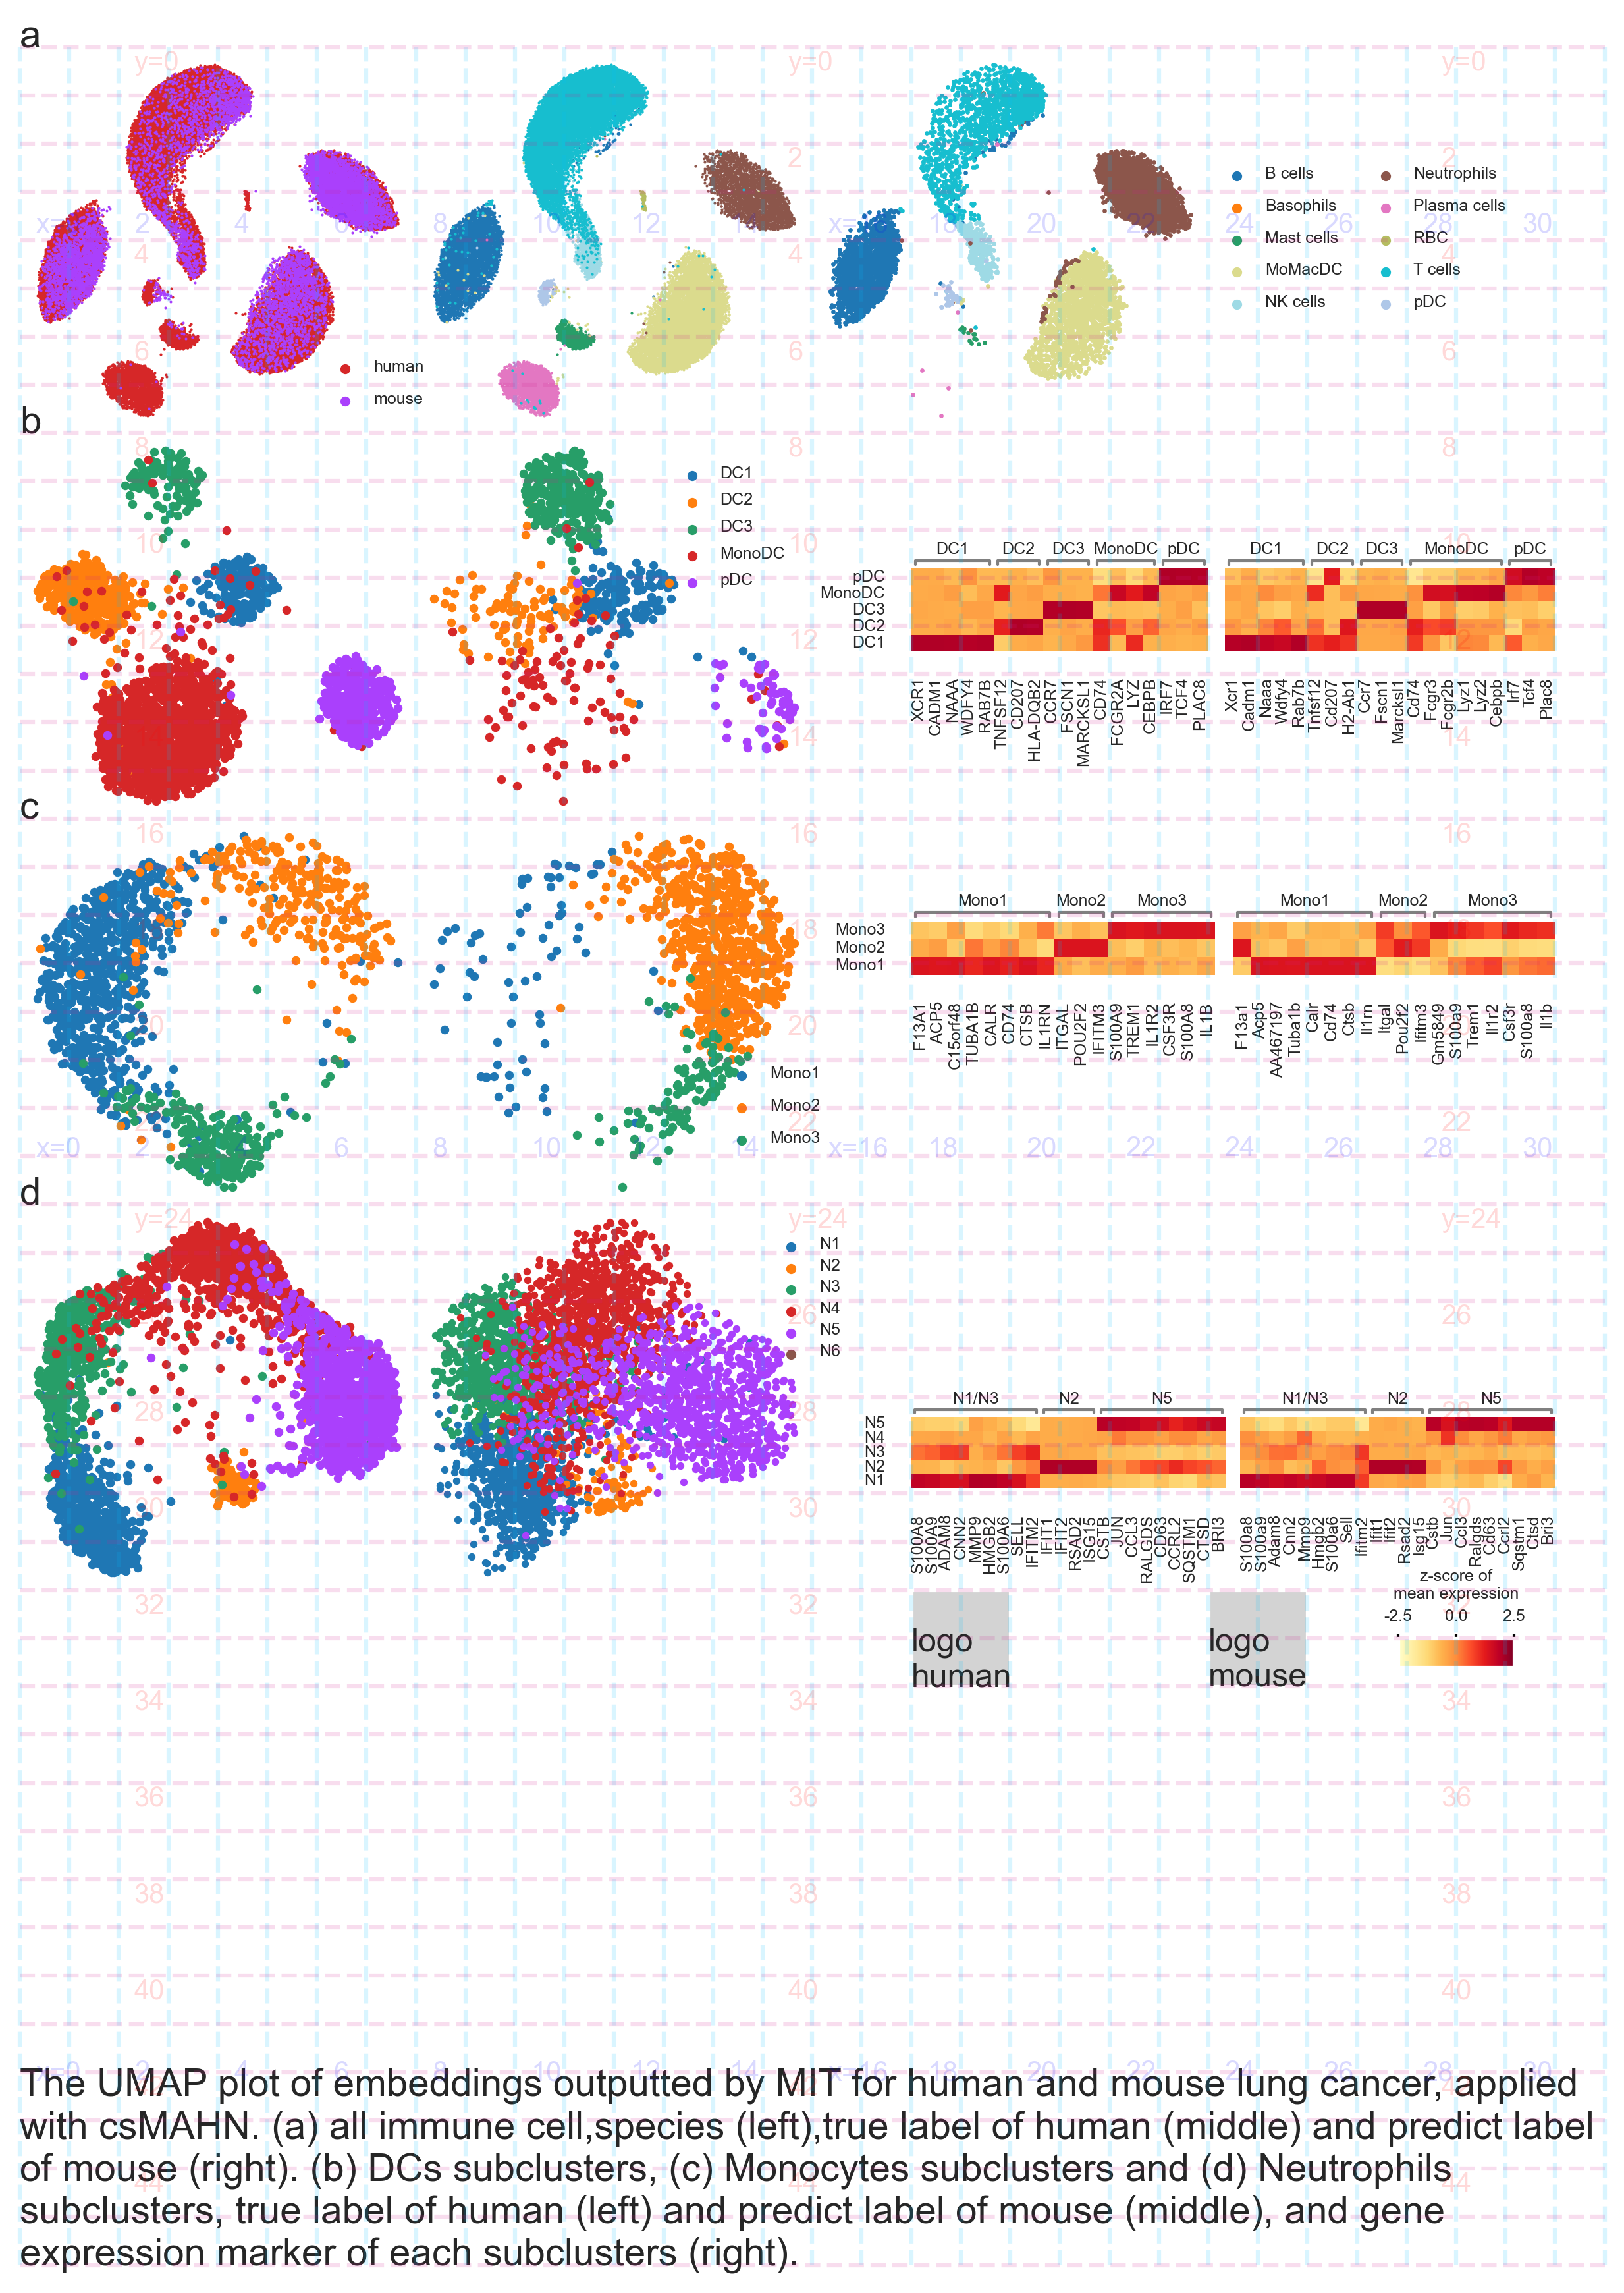

In [10]:
fig = plt.figure(figsize=(8.27, 11.69))
spec = fig.add_gridspec(nrows=46, ncols=32,
                        left=0.03, right=1,  # 设置边距
                        bottom=0.02, top=0.98,  # 设置边距
                        wspace=0, hspace=0)  # 设置子图间距
# LCall----------------------------------------
_ = 'LCall'
row = df.loc['{};{}'.format(model, _[2:]), :]
with Block('UMAP'):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 0, 8, 8)
    plot_umap(
        ppara_adata_umap[_],
        'sp',
        ppara_color_map['sp'],
        ax=ax,
        size=1,
        show_legend=False)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 0, 8, 8)
    plot_umap(
        subset_adata(ppara_adata_umap[_], 'dataset_type', ['ref']),
        'true_label', ppara_color_map[_], ax=ax, size=1,
        show_legend=False)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 16, 0, 8, 8)
    plot_umap(subset_adata(ppara_adata_umap[_], 'dataset_type', ['que']),
              'pre_label', ppara_color_map[_], ax=ax,
              size=5, show_legend=False)
with Block('UMAP legend'):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 6, 6, 2, 2)
    show_color_map(ppara_color_map['sp'], marker='.', ax=ax)
    ax.set_ymargin(1)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 24, 0, 2, 8)
    show_color_map(
        {_key: _value for _i, (_key, _value) in enumerate(
            ppara_color_map[_].items()) if _i < 5},
        marker='.', ax=ax)
    ax.set_ymargin(1)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 27, 0, 2, 8)
    # ax = fig.add_subplot(spec[0:4, 14])
    show_color_map(
        {_key: _value for _i, (_key, _value) in enumerate(
            ppara_color_map[_].items()) if _i >= 5},
        marker='.', ax=ax)
    ax.set_ymargin(1)

# LCDCs ----------------------------------------
_ = 'LCDCs'
row = df.loc['{};{}'.format(model, _[2:]), :]
with Block('UMAP'):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 8, 8, 8)
    plot_umap(
        subset_adata(
            ppara_adata_umap[_], 'dataset_type', ['ref']),
        'true_label', ppara_color_map[_],
        ax=ax, size=30, show_legend=False)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 8, 8, 8)
    plot_umap(subset_adata(ppara_adata_umap[_], 'dataset_type', ['que']),
              'pre_label', ppara_color_map[_], ax=ax,
              size=30, show_legend=False)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 13, 8, 2, 4)
    show_color_map(
        ppara_color_map[_],
        marker='.', ax=ax)
    ax.set_ymargin(.4)
with Block('marker'):
    adata_ref = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_ref']),
        ppara_adata_umap[_].obs)
    adata_que = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_que']),
        ppara_adata_umap[_].obs)

    _temp = []
    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            adata_ref,
            'true_label',
            ppara_data['marker_LCDCs']['ref']))

    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            adata_que,
            'pre_label',
            ppara_data['marker_LCDCs']['que']))

    df_marker, df_plot = ppara_plot_function_custom[
        'heatmap_gene_process_multi_marker_and_df_plot'](_temp)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 18, 8, 13, 7)
    ppara_plot_function_custom['heatmap_gene'](df_plot, df_marker, ax,
                                               cbar=False)


# LCMono ----------------------------------------
_ = 'LCMono'
row = df.loc['{};{}'.format(model, _[2:]), :]
with Block('UMAP'):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 16, 8, 8)
    plot_umap(
        subset_adata(
            ppara_adata_umap[_],
            'dataset_type',
            ['ref']),
        'true_label',
        ppara_color_map[_],
        ax=ax,
        size=30,
        show_legend=False)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 16, 8, 8)
    plot_umap(subset_adata(ppara_adata_umap[_], 'dataset_type', ['que']),
              'pre_label', ppara_color_map[_], ax=ax,
              size=30, show_legend=False)
    # legend
    ax = plt_pdf_add_ax_with_spec(fig, spec, 14, 20, 2, 4)
    show_color_map(
        ppara_color_map[_],
        marker='.', ax=ax)
    ax.set_ymargin(1)
with Block('marker'):
    adata_ref = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_ref']),
        ppara_adata_umap[_].obs)
    adata_que = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_que']),
        ppara_adata_umap[_].obs)

    _temp = []
    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            adata_ref,
            'true_label',
            ppara_data['marker_LCMono']['ref']))

    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            adata_que,
            'pre_label',
            ppara_data['marker_LCMono']['que']))

    df_marker, df_plot = ppara_plot_function_custom[
        'heatmap_gene_process_multi_marker_and_df_plot'](_temp)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 18, 16, 13, 5)
    ppara_plot_function_custom['heatmap_gene'](df_plot, df_marker, ax,
                                               cbar=False)

# LCNeu ----------------------------------------
_ = 'LCNeu'
row = df.loc['{};{}'.format(model, _[2:]), :]
with Block('UMAP'):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 24, 8, 8)
    plot_umap(
        subset_adata(
            ppara_adata_umap[_],
            'dataset_type',
            ['ref']),
        'true_label',
        ppara_color_map[_],
        ax=ax,
        size=30,
        show_legend=False)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 24, 8, 8)
    plot_umap(
        subset_adata(
            ppara_adata_umap[_],
            'dataset_type',
            ['que']),
        'pre_label',
        ppara_color_map[_],
        ax=ax,
        size=20,
        show_legend=False)

    # LCNeu legend ----------------------------------------
    ax = plt_pdf_add_ax_with_spec(fig, spec, 15, 24, 2, 4)
    show_color_map(
        ppara_color_map[_],
        marker='.', ax=ax)
    ax.set_ymargin(.4)
with Block('marker'):
    adata_ref = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_ref']),
        ppara_adata_umap[_].obs)
    adata_que = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_que']),
        ppara_adata_umap[_].obs)

    _temp = []
    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            adata_ref,
            'true_label',
            ppara_data['marker_LCNeu']['ref']))

    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            adata_que,
            'pre_label',
            ppara_data['marker_LCNeu']['que']))

    df_marker, df_plot = ppara_plot_function_custom[
        'heatmap_gene_process_multi_marker_and_df_plot'](_temp)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 18, 24, 13, 10)
    ppara_plot_function_custom['heatmap_gene'](df_plot, df_marker, ax,
                                               cbar=False)

with Block('marker colorbar'):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 26, 33, 6, 4)
    _axesimage = ax.imshow([[-2.5, 2.5], [0, 1]],
                           vmax=2.5, vmin=-2.5, cmap=cm)
    _colorbar = fig.colorbar(_axesimage, ax=ax,
                             location='top', orientation='horizontal',
                             shrink=.5,
                             aspect=4,  # colorbar 长宽比
                             label='z-score of\nmean expression'
                             )
    _fontdict_default = {
        _k: mpl.rcParams[_k.replace('font', 'font.')]
        for _k in 'fontfamily,fontsize,fontweight'.split(',')
    }
    _colorbar.set_label('z-score of\nmean expression', **_fontdict_default)
    _colorbar.ax.tick_params('both', width=1, length=1.5, color='black')
    _colorbar.set_ticks(_colorbar.get_ticks(),
                        # _colorbar.get_ticks().astype(str),
                        labels=list(_colorbar.get_ticks().astype(str)),
                        **_fontdict_default)
    fig.delaxes(ax)

with Block('text'):
    for _text, _x, _y in zip(
        'a,b,c,d'.split(','),
        [int(_) for _ in '0,0,0,0'.split(',')],
            [int(_) for _ in '0,8,16,24'.split(',')]):
        plt_pdf_add_text_with_ax(
            plt_pdf_add_ax_with_spec(
                fig, spec, _x, _y), _text)

with Block('note'):
    _text = """The UMAP plot of embeddings outputted by MIT for human and mouse lung cancer, applied
with csMAHN. (a) all immune cell,species (left),true label of human (middle) and predict label
of mouse (right). (b) DCs subclusters, (c) Monocytes subclusters and (d) Neutrophils
subclusters, true label of human (left) and predict label of mouse (middle), and gene
expression marker of each subclusters (right)."""
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 45, 42)
    plt_pdf_add_text_with_ax(ax, _text, 0, 0)

with Block('logo'):
    # logo ----------------------------------------
    ax = plt_pdf_add_ax_with_spec(fig, spec, 18, 32, 2, 2)
    ax.text(0, 0, 'logo\nhuman', fontdict={'fontsize': 12})
    ax.set_facecolor('#D3D3D3'), ax.set_xticks(
        [], []), ax.set_yticks(
        [], [])
    ax = plt_pdf_add_ax_with_spec(fig, spec, 24, 32, 2, 2)
    ax.text(0, 0, 'logo\nmouse', fontdict={'fontsize': 12})
    ax.set_facecolor('#D3D3D3'), ax.set_xticks(
        [], []), ax.set_yticks(
        [], [])

# save ----------------------------------------
# with PdfPages('ouput.pdf') as pdf:
with PdfPages(p_pdf.joinpath('{}_{}_1.pdf'.format(item, model))) as pdf:
    pdf.savefig(fig)
    plt.close('all')
plt_pdf_add_grid_customer(fig)
display(fig)

In [11]:
df_marker

,cell_type,gene,group,line_start,line_end,cell_type_mask,gene_mask
0,N1/N3,S100A8,0,True,False,N1/N3,S100A8
1,N1/N3,S100A9,0,False,False,N1/N3,S100A9
2,N1/N3,ADAM8,0,False,False,N1/N3,ADAM8
3,N1/N3,CNN2,0,False,False,N1/N3,CNN2
4,N1/N3,MMP9,0,False,False,N1/N3,MMP9
5,N1/N3,HMGB2,0,False,False,N1/N3,HMGB2
6,N1/N3,S100A6,0,False,False,N1/N3,S100A6
7,N1/N3,SELL,0,False,False,N1/N3,SELL
8,N1/N3,IFITM2,0,False,False,N1/N3,IFITM2
9,N2,IFIT1,0,True,True,N2,IFIT1


# pdf_supp

In [12]:
show_dict_key(ppara_plot_function_custom, 'ppara_plot_function_custom')


>ppara_plot_function_custom['']-------------------------------------------
	df_varmap_query_exists
	heatmap
	heatmap_gene
	heatmap_gene_get_marker_and_df_plot
	heatmap_gene_process_multi_marker_and_df_plot
	umap_gene


In [13]:
with Block("ppara_data hm_confusion_matrix_true"):
    for _ in ppara_adata_umap.keys():
        _data = ppara_adata_umap[_].obs
        _data = group_agg(_data, 'sp,true_label'.split(','), rename_dict={
            'sp': 'species',
            'true_label': 'original label',
            'true_label_count': 'count'

        })
        _data = _data.pivot(
            index='original label',
            columns='species',
            values='count')
        ppara_data['{}_hm_confusion_matrix_true'.format(_)] = _data

with Block("ppara_data m_confusion_matrix_true_pre"):
    for _ in ppara_adata_umap.keys():
        _data = ppara_adata_umap[_].obs.query("dataset_type == 'que'")
        _data = group_agg(
            _data,
            'true_label,pre_label'.split(','),
            rename_dict={
                'true_label': 'original label',
                'pre_label': 'predict label',
                'pre_label_count': 'count'})
        _data = _data.pivot(
            index='original label',
            columns='predict label',
            values='count')
        _data = _data.fillna(0)
        ppara_data['{}_m_confusion_matrix_true_pre'.format(_)] = _data
        ppara_data['{}_m_confusion_matrix_true_pre_zscore'.format(
            _)] = stats.zscore(_data, axis=1)

with Block("ppara_data['DEG_LCall_h_true_label']"):
    if not p_plot.joinpath(
        'data/LC/DEG',
            'DEG_LCall_h_true_label.csv').exists():
        print('[DEG][run] LCall h true_label')
        _adata = load_normalized_adata(find_path_from_para(df_para, df.loc['{};{}'.format(
            model, 'LCall'[2:]), 'name_ref']), ppara_adata_umap['LCall'].obs)
        sc.tl.rank_genes_groups(_adata, 'true_label', method='wilcoxon')
        sc.get.rank_genes_groups_df(
            _adata,
            _adata.obs['true_label'].unique()).to_csv(
            p_plot.joinpath(
                'data/LC/DEG',
                'DEG_LCall_h_true_label.csv'),
            index=False)
        print('[out] DEG_LCall_h_true_label.csv')
        del _adata
    ppara_data['DEG_LCall_h_true_label'] = pd.read_csv(
        p_plot.joinpath(
            'data/LC/DEG',
            'DEG_LCall_h_true_label.csv')) .query("logfoldchanges > 1.5 & pvals_adj < 0.01")

with Block("ppara_data['DEG_LCall_m_true_label']"):
    if not p_plot.joinpath(
        'data/LC/DEG',
            'DEG_LCall_m_true_label.csv').exists():
        print('[DEG][run] LCall m true_label')
        _adata = load_normalized_adata(find_path_from_para(df_para, df.loc['{};{}'.format(
            model, 'LCall'[2:]), 'name_que']), ppara_adata_umap['LCall'].obs)
        sc.tl.rank_genes_groups(_adata, 'true_label', method='wilcoxon')
        sc.get.rank_genes_groups_df(
            _adata,
            _adata.obs['true_label'].unique()).to_csv(
            p_plot.joinpath(
                'data/LC/DEG',
                'DEG_LCall_m_true_label.csv'),
            index=False)
        print('[out] DEG_LCall_m_true_label.csv')
        del _adata
    ppara_data['DEG_LCall_m_true_label'] = pd.read_csv(
        p_plot.joinpath(
            'data/LC/DEG',
            'DEG_LCall_m_true_label.csv')) .query("logfoldchanges > 1.5 & pvals_adj < 0.01")

with Block("ppara_data['homo']"):
    _data = pd.read_csv(get_path_varmap('human', 'mouse')).dropna(axis=0)
    _data.columns = 'gn_ref,gn_que,gn_type'.split(',')
    ppara_data['homo'] = _data

with Block("ppara_data['homo_marker_hMast_mBas']"):
    _data = ppara_plot_function_custom['df_varmap_query_exists'](
        ppara_data['homo'],
        ppara_data['DEG_LCall_h_true_label'].query("group == 'Mast cells'")['names'],
        ppara_data['DEG_LCall_m_true_label'].query("group == 'Basophils'")['names'])
    ppara_data['homo_marker_hMast_mBas'] = _data

with Block("ppara_data['marker_LCall_hM_mBas']"):
    ppara_data['marker_LCall_hM_mBas'] = {
        'ref': {'mast cell': 'ENPP3,KIT,FCER1A'.split(','),
                'Basophils': 'ITGA2,FCER1G'.split(',')},
        'que': {'mast cell': 'Enpp1,Kit,Fcer1a'.split(','),
                'Basophils': 'Itga2,Fcer1g'.split(',')}
    }

# LCall_que_true_Basophils 富集到了IL-1 白细胞迁移等
# 连细胞类型都看不出来，这玩意到底是啥
with Block("EnrichmentAnalysis LCall_ref_true_Mast"):
    if not p_plot.joinpath(
            'data/EnrichmentAnalysis/LCall_ref_true_Mast').exists():
        _df_rank_gene = ppara_data['DEG_LCall_h_true_label'].query(
            "group == 'Mast cells'")
        print('[Enrich] {} genes'.format(_df_rank_gene.shape[0]))
        EnrichmentAnalysis_run_with_r(
            'LCall_ref_true_Mast',
            'c5.go.bp', ','.join(
                _df_rank_gene['names']))
with Block("EnrichmentAnalysis LCall_que_true_Basophils"):
    if not p_plot.joinpath(
            'data/EnrichmentAnalysis/LCall_que_true_Basophils').exists():
        _df_rank_gene = ppara_data['DEG_LCall_m_true_label'].query(
            "group == 'Basophils'")
        print('[Enrich] {} genes'.format(_df_rank_gene.shape[0]))
        EnrichmentAnalysis_run_with_r(
            'LCall_que_true_Basophils',
            'm5.go.bp', ','.join(
                _df_rank_gene['names']))

In [14]:
show_dict_key(ppara_data, 'ppara_data')
show_dict_key(ppara_plot_function_custom, 'ppara_plot_function_custom')

show_dict_key(ppara_color_map, 'ppara_color_map')


>ppara_data['']-----------------------------------------------------------
	DEG_LCall_h_true_label
	DEG_LCall_m_true_label
	LCDCs_hm_confusion_matrix_true
	LCDCs_m_confusion_matrix_true_pre
	LCDCs_m_confusion_matrix_true_pre_zscore
	LCMono_hm_confusion_matrix_true
	LCMono_m_confusion_matrix_true_pre
	LCMono_m_confusion_matrix_true_pre_zscore
	LCNeu_hm_confusion_matrix_true
	LCNeu_m_confusion_matrix_true_pre
	LCNeu_m_confusion_matrix_true_pre_zscore
	LCall_hm_confusion_matrix_true
	LCall_m_confusion_matrix_true_pre
	LCall_m_confusion_matrix_true_pre_zscore
	homo
	homo_marker_hMast_mBas
	key_scpl_show_genes
	marker_LCDCs
	marker_LCMono
	marker_LCNeu
	marker_LCall_hM_mBas

>ppara_plot_function_custom['']-------------------------------------------
	df_varmap_query_exists
	heatmap
	heatmap_gene
	heatmap_gene_get_marker_and_df_plot
	heatmap_gene_process_multi_marker_and_df_plot
	umap_gene

>ppara_color_map['']------------------------------------------------------
	LCDCs
	LCMono
	LCNeu
	LCal

> marker and gene name
|cell_type|marker|human|mouse|
|:-|:-|:-|:-|
|mast cell|CD203c|ENPP3|Enpp1|
||CD117|KIT|Kit|
||FcεRIα |FCER1A|Fcer1a|
|Basophils|CD49b|ITGA2|Itga2|
||Fc-epsilon|FCER1G|Fcer1g|

In [15]:
_ = 'LCNeu'

with Block("display confusion_matrix"):
    print('\n> {}_hm_confusion_matrix_true'.format(_))
    display(
        ppara_data['{}_hm_confusion_matrix_true'.format(_)]
        .style.highlight_null()
        .format(precision=0)
    )

    print('\n> {}_m_confusion_matrix_true_pre'.format(_))
    display(
        ppara_data['{}_m_confusion_matrix_true_pre'.format(_)]
        .style.highlight_null()
        .background_gradient(axis=1, cmap='bwr')
        .format(precision=0)
    )


> LCNeu_hm_confusion_matrix_true


species,human,mouse
original label,,
N1,526,968
N2,86,24
N3,425,130
N4,789,1782
N5,902,580
N6,nan,109



> LCNeu_m_confusion_matrix_true_pre


predict label,N1,N2,N3,N4,N5
original label,,,,,
N1,504,25,285,104,50
N2,4,19,1,0,0
N3,11,4,13,72,30
N4,182,42,393,717,448
N5,19,14,20,61,466
N6,44,0,19,30,16


## plot pdf

In [16]:
show_dict_key(ppara_plot_function_custom,'ppara_plot_function_custom')
ppara_plot_function_custom['heatmap_gene_process_multi_marker_and_df_plot']
ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot']
ppara_plot_function_custom['heatmap_gene']


>ppara_plot_function_custom['']-------------------------------------------
	df_varmap_query_exists
	heatmap
	heatmap_gene
	heatmap_gene_get_marker_and_df_plot
	heatmap_gene_process_multi_marker_and_df_plot
	umap_gene


<function init_plot._func(df_plot, df_marker, ax, zscore=True, cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x7f0c905dbe20>, cbar=False, line_h=0.25, kv_line={'linestyle': '-', 'linewidth': 1, 'color': 'grey', 'dash_joinstyle': 'miter', 'dash_capstyle': 'butt'}, kv_heatmap={'vmax': 2.5, 'vmin': -2.5}, **kvargs)>

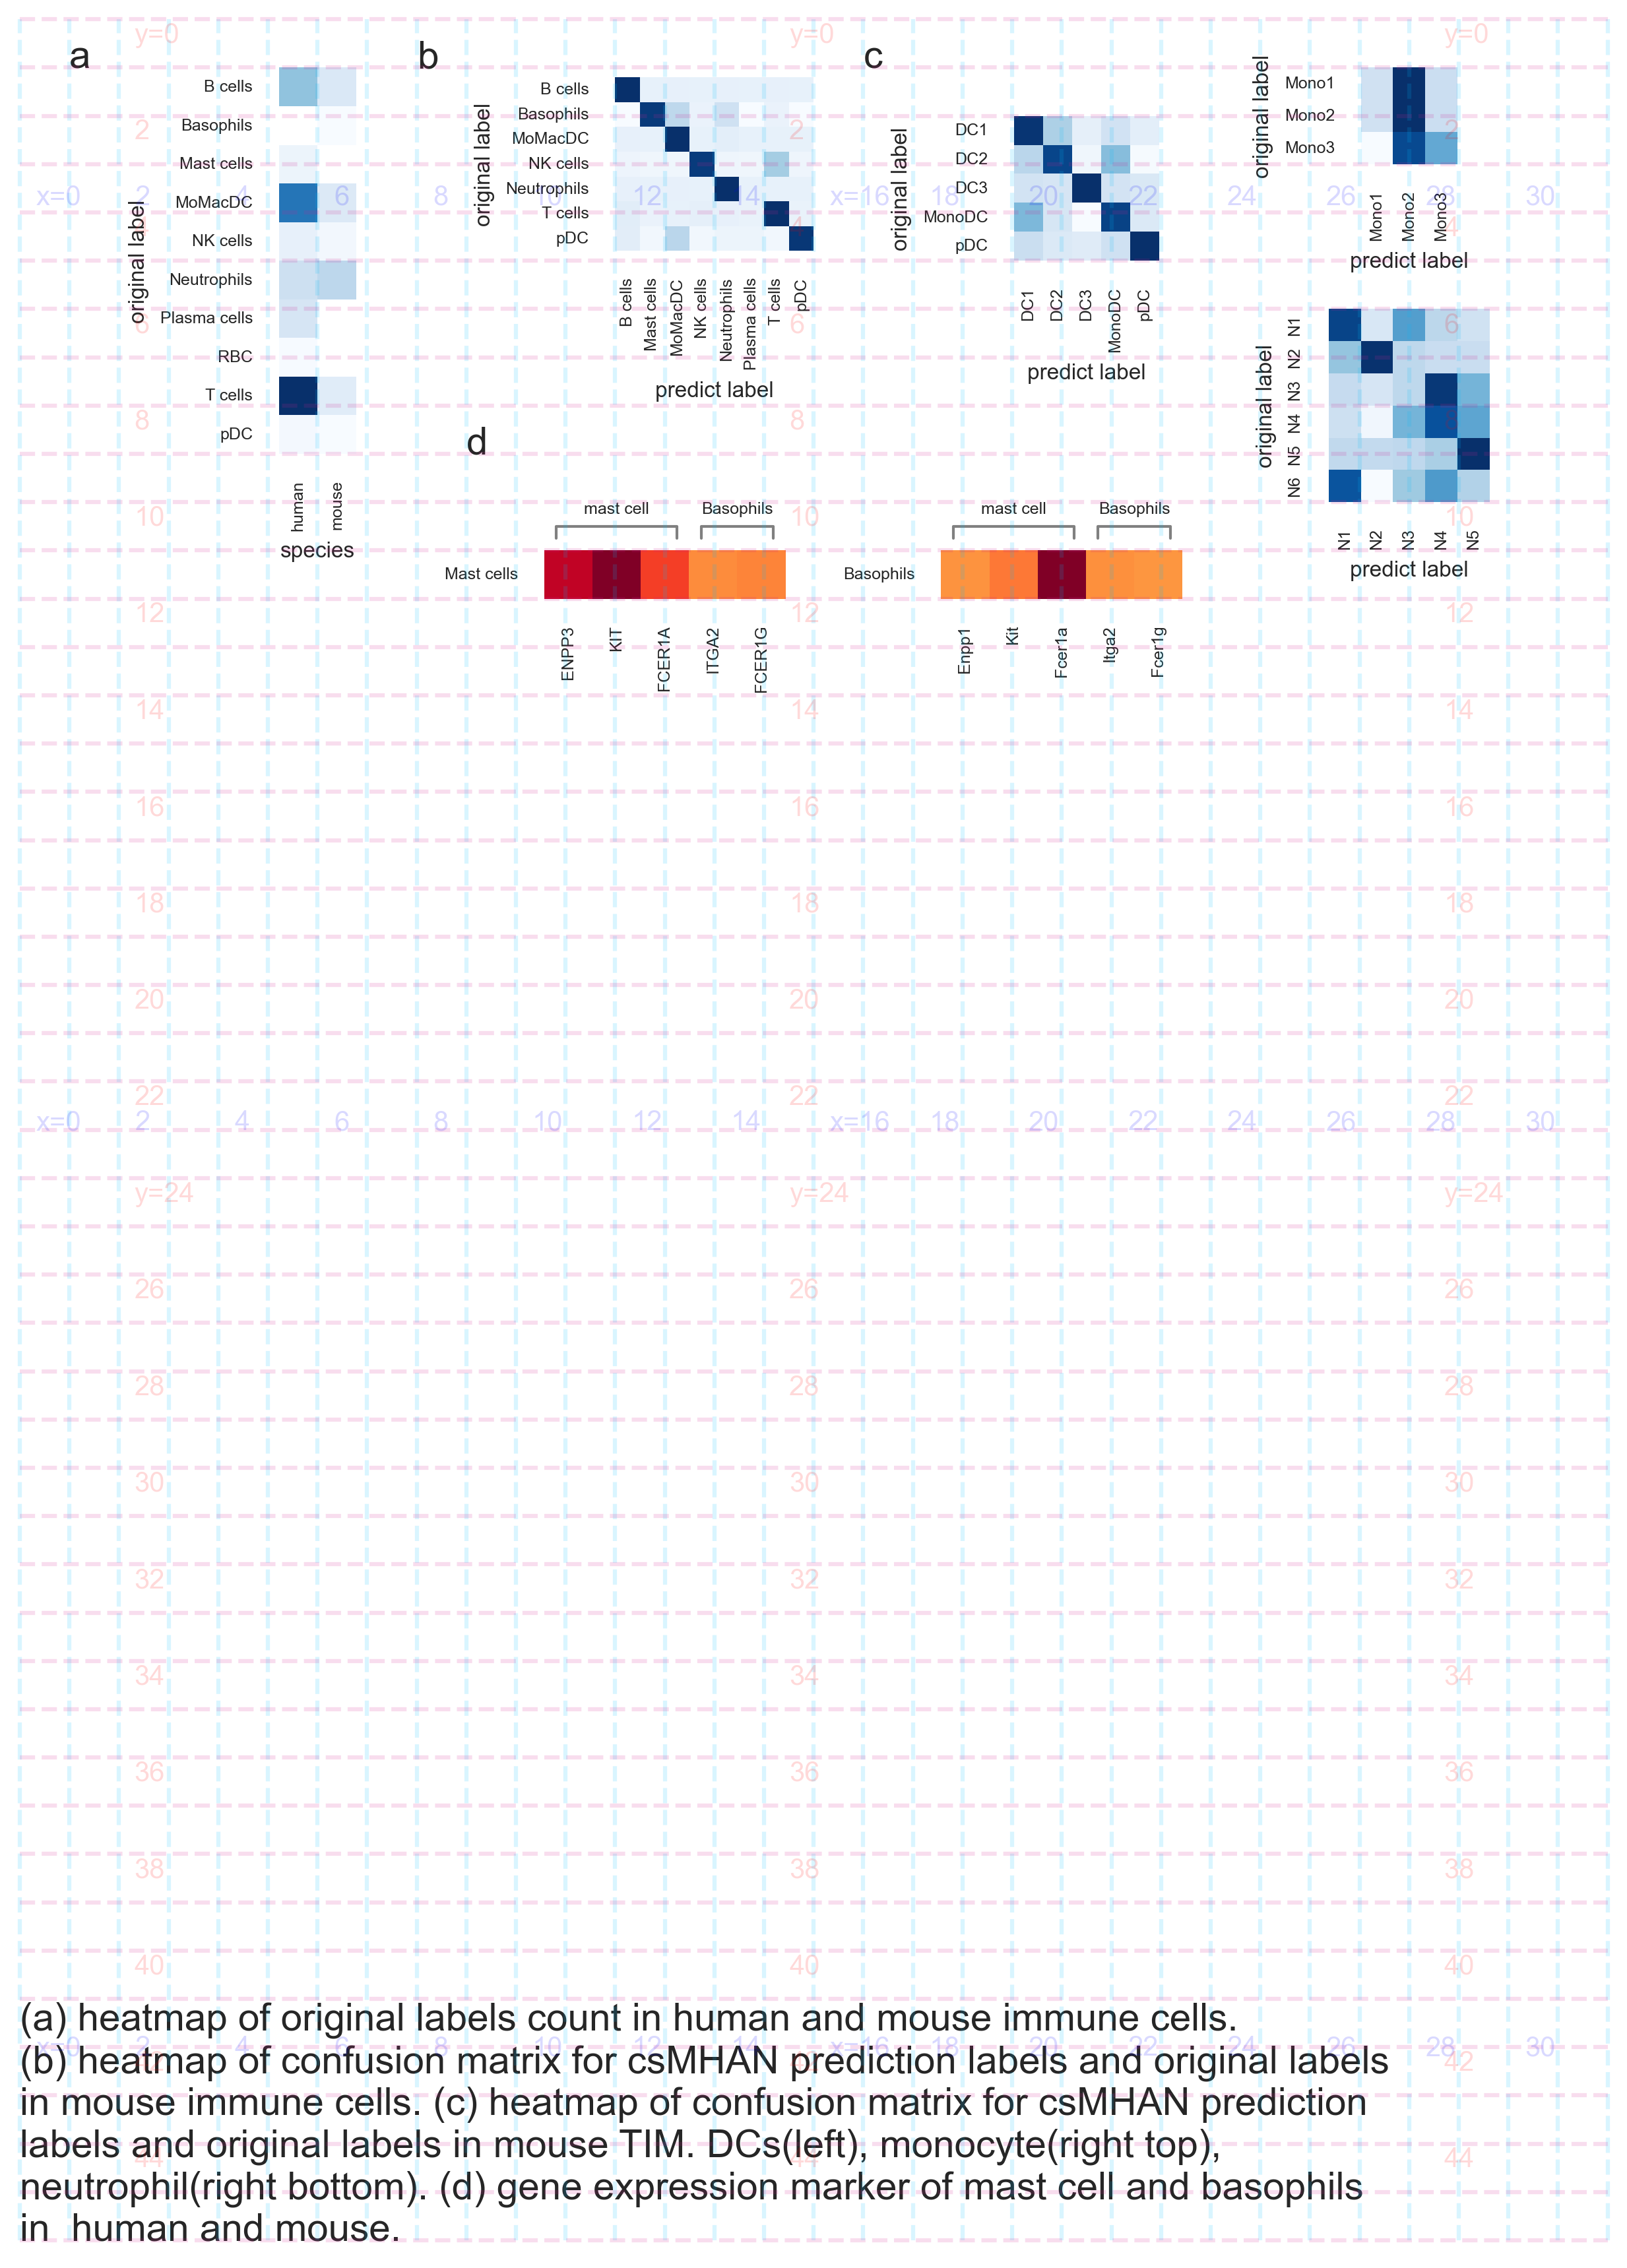

In [17]:
fig = plt.figure(figsize=(8.27, 11.69))
spec = fig.add_gridspec(nrows=46, ncols=32,
                        left=0.03, right=1,  # 设置边距
                        bottom=0.02, top=0.98,  # 设置边距
                        wspace=0, hspace=0)  # 设置子图间距

with Block("heatmap LCall_hm_confusion_matrix_true"):
    ax = plt_pdf_add_ax_with_spec(fig, spec, 4, 1, 4, 8)
    ppara_plot_function_custom['heatmap'](
        ppara_data['LCall_hm_confusion_matrix_true'],
        ax=ax
    )
with Block("heatmap m_confusion_matrix_true_pre_zscore"):
    _ = 'LCall'
    ax = plt_pdf_add_ax_with_spec(fig, spec, 12, 1, 4, 4)
    ppara_plot_function_custom['heatmap'](
        ppara_data['{}_m_confusion_matrix_true_pre_zscore'.format(_)],
        ax=ax)

    _ = 'LCDCs'
    ax = plt_pdf_add_ax_with_spec(fig, spec, 20, 2, 3, 3)
    ppara_plot_function_custom['heatmap'](
        ppara_data['{}_m_confusion_matrix_true_pre_zscore'.format(_)],
        ax=ax
    )

    _ = 'LCMono'
    ax = plt_pdf_add_ax_with_spec(fig, spec, 27, 1, 2, 2)
    ppara_plot_function_custom['heatmap'](
        ppara_data['{}_m_confusion_matrix_true_pre_zscore'.format(_)],
        ax=ax
    )

    _ = 'LCNeu'
    ax = plt_pdf_add_ax_with_spec(fig, spec, 26, 6, 4, 4)
    ppara_plot_function_custom['heatmap'](
        ppara_data['{}_m_confusion_matrix_true_pre_zscore'.format(_)],
        ax=ax
    )
with Block("marker hM_mBas h"):
    _ = 'LCall'
    row = df.loc['{};{}'.format(model, _[2:]), :]
    adata_ref = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_ref']),
        ppara_adata_umap[_].obs)

    _temp = []
    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            subset_adata(adata_ref, 'true_label', 'Mast cells'),
            'true_label',ppara_data['marker_LCall_hM_mBas']['ref']))
    df_marker,df_plot =  ppara_plot_function_custom['heatmap_gene_process_multi_marker_and_df_plot'](_temp)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 10, 10, 6, 2)
    ppara_plot_function_custom['heatmap_gene'](df_plot,df_marker,ax,
                                               zscore=False)

    del adata_ref, row, _
with Block("marker hM_mBas m"):
    _ = 'LCall'
    row = df.loc['{};{}'.format(model, _[2:]), :]
    adata_que = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_que']),
        ppara_adata_umap[_].obs)

    _temp = []
    _temp.append(
        ppara_plot_function_custom['heatmap_gene_get_marker_and_df_plot'](
            subset_adata(adata_que, 'true_label', 'Basophils'),
            'true_label',ppara_data['marker_LCall_hM_mBas']['que']))
    df_marker,df_plot =  ppara_plot_function_custom['heatmap_gene_process_multi_marker_and_df_plot'](_temp)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 18, 10, 6, 2)
    ppara_plot_function_custom['heatmap_gene'](df_plot,df_marker,ax,
                                               zscore=False)
    del adata_que, row, _

with Block('text'):
    for _text, _x, _y in zip(
        'a,b,c,d'.split(','),
        [int(_) for _ in '1,8,17,9'.split(',')],
        [int(_) for _ in '1,1,1,9'.split(',')]):
        plt_pdf_add_text_with_ax(
            plt_pdf_add_ax_with_spec(
                fig, spec, _x, _y), _text)

with Block('note'):
    _text = """
(a) heatmap of original labels count in human and mouse immune cells.
(b) heatmap of confusion matrix for csMHAN prediction labels and original labels
in mouse immune cells. (c) heatmap of confusion matrix for csMHAN prediction
labels and original labels in mouse TIM. DCs(left), monocyte(right top),
neutrophil(right bottom). (d) gene expression marker of mast cell and basophils
in  human and mouse."""
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 45, 42)
    plt_pdf_add_text_with_ax(ax, _text, 0, 0)

# save ----------------------------------------
# with PdfPages('ouput.pdf') as pdf:
with PdfPages(p_pdf.joinpath('{}_{}_supp.pdf'.format(item, model))) as pdf:
    pdf.savefig(fig)
    plt.close('all')
plt_pdf_add_grid_customer(fig)
display(fig)

# finish

In [18]:
print('\n[finish]\n'.center(100, '-'))

---------------------------------------------
[finish]
---------------------------------------------


# draft

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:325: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:406: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pd.DataFrame(_matrix.stack(dropna=False))
/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:463: FutureWarning: 

Passing `palett

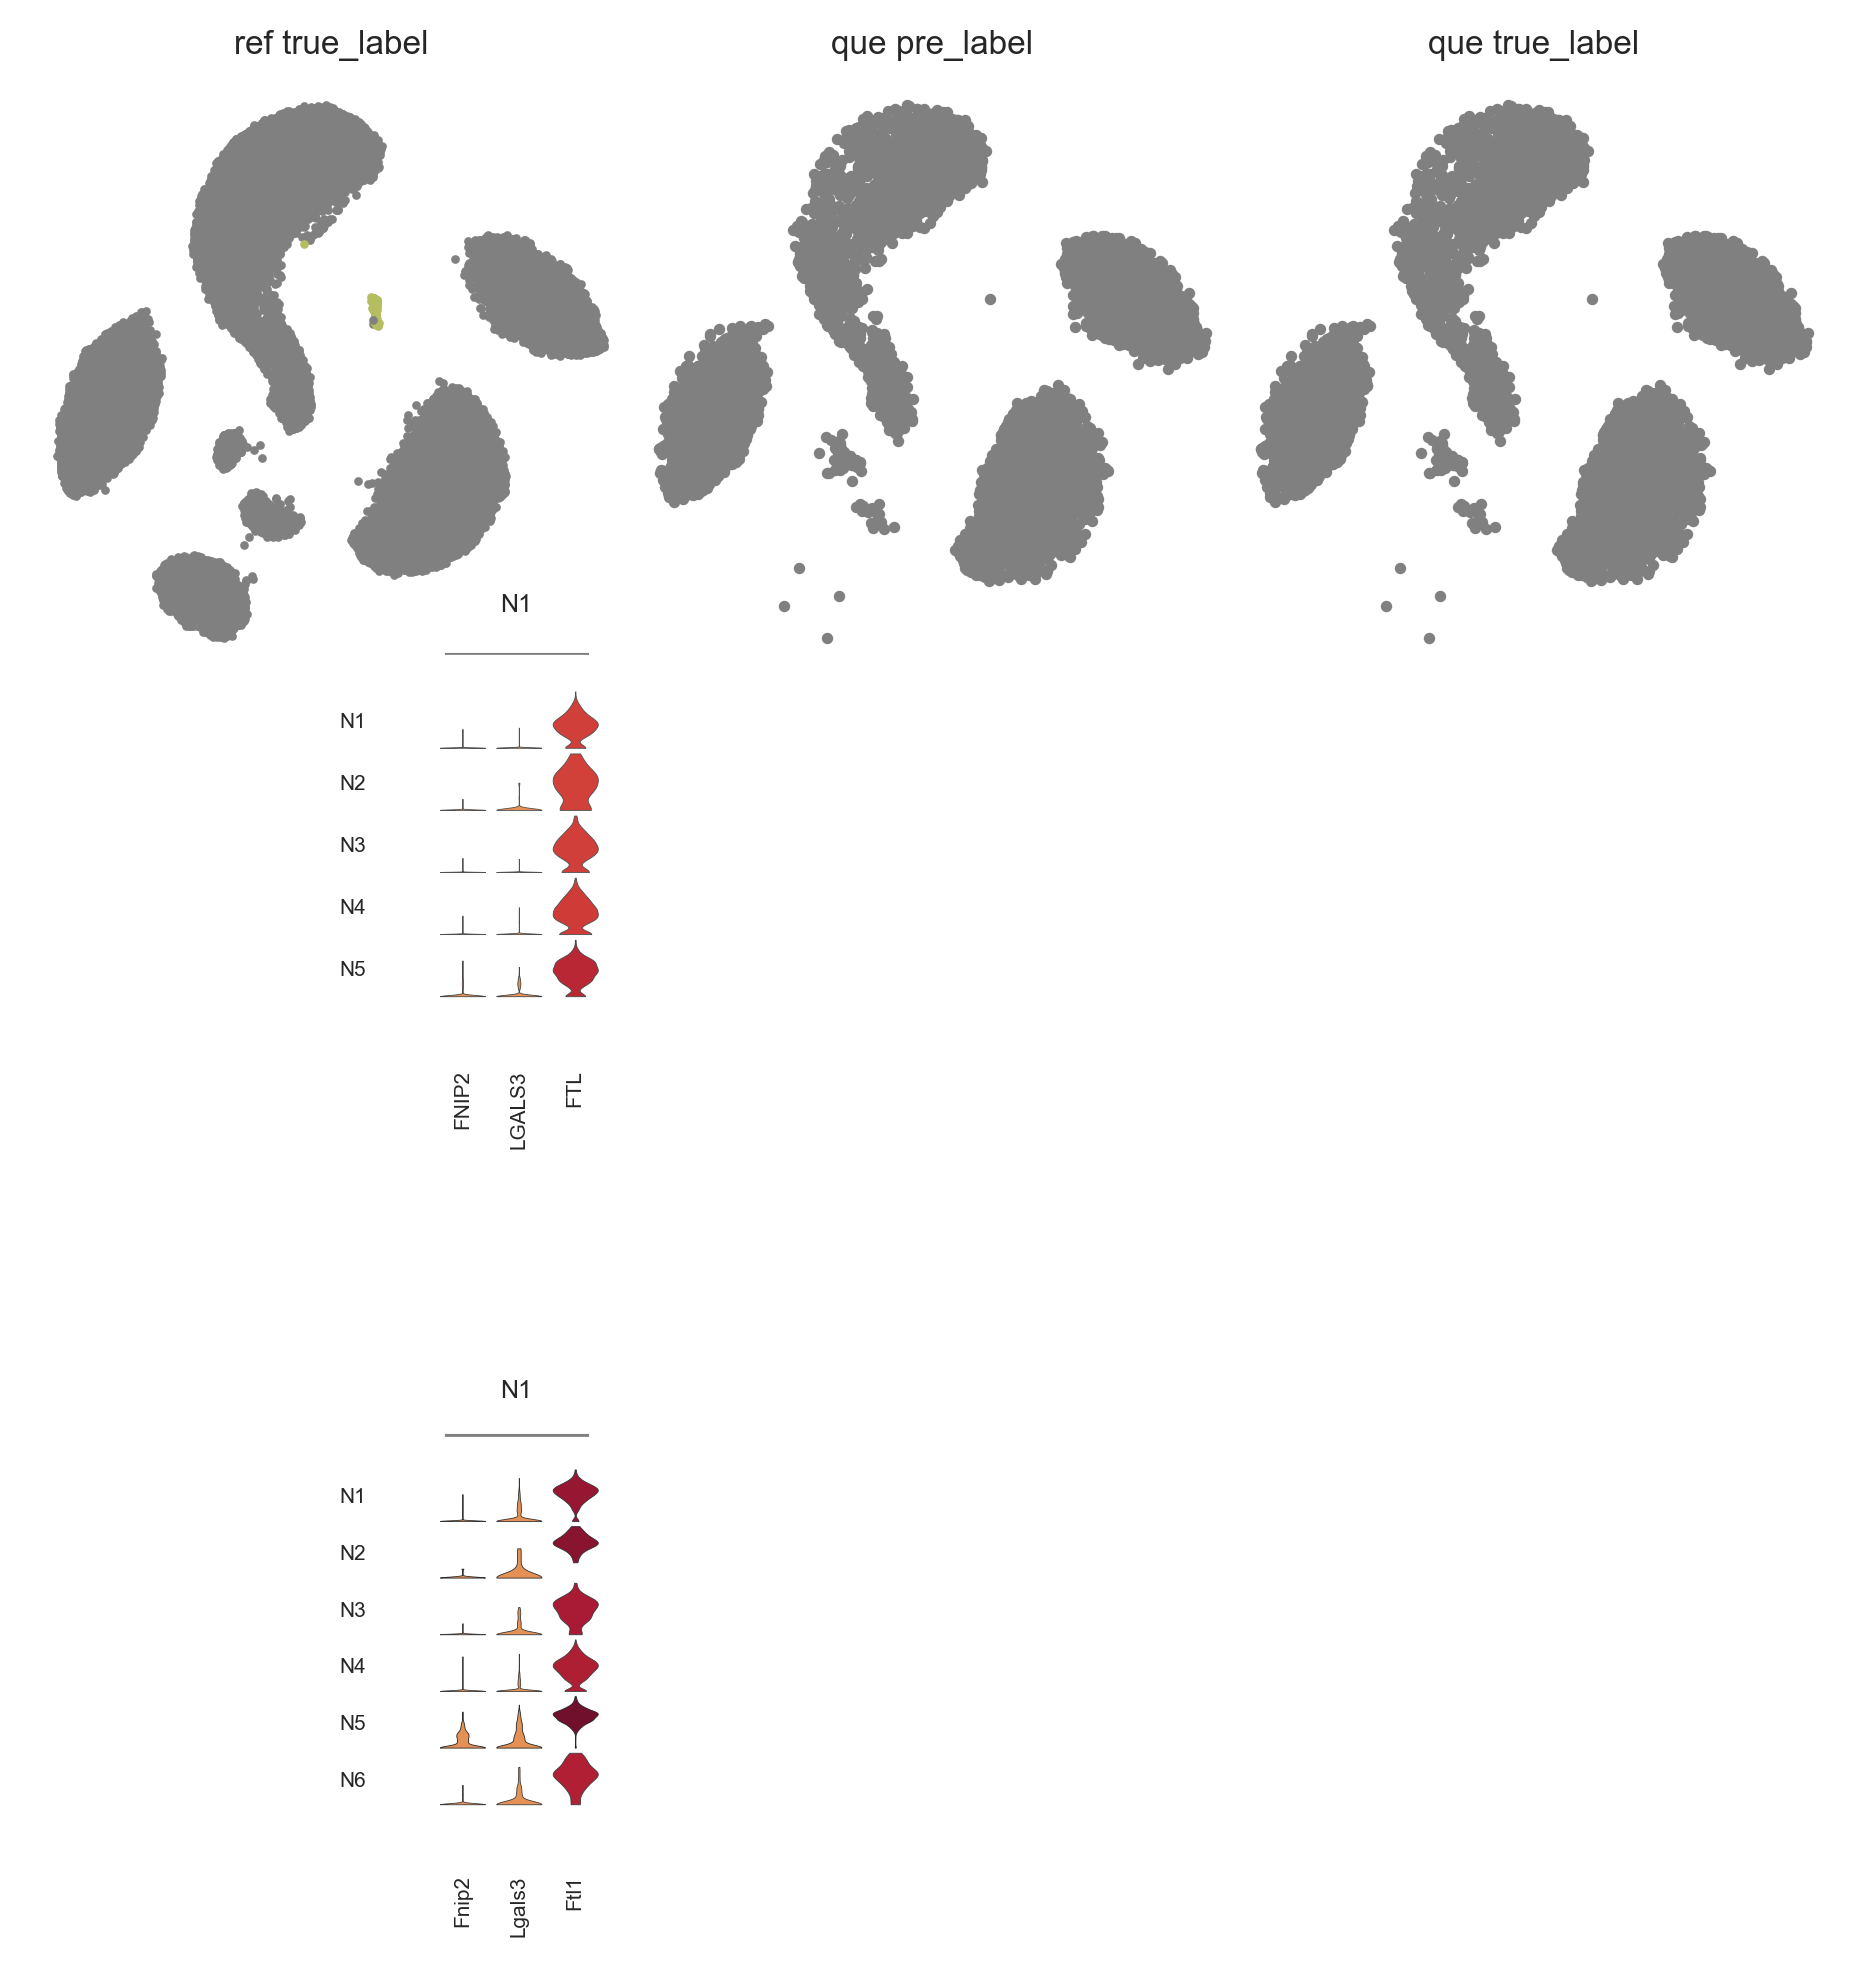

In [19]:
fig = plt.figure(figsize=(8.27, 11.69))
spec = fig.add_gridspec(nrows=46, ncols=32,
                        left=0.03, right=1,  # 设置边距
                        bottom=0.02, top=0.98,  # 设置边距
                        wspace=0, hspace=0)  # 设置子图间距
# LCall----------------------------------------
with Block("UMAP 仅显示一种细胞的颜色"):
    _ = 'LCall'
    _ct = 'RBC'
    _color_map = ppara_color_map['LCall'].copy()

    [_color_map.update({_k: 'grey'}) for _k in _color_map.keys()
     if _k != _ct]
    ax = plt_pdf_add_ax_with_spec(fig, spec, 0, 1, 8, 8)
    plot_umap(
        subset_adata(ppara_adata_umap[_], 'dataset_type', 'ref'),
        'true_label', _color_map, ax=ax, size=10, show_legend=False)
    ax.set_title('ref true_label')
    ax = plt_pdf_add_ax_with_spec(fig, spec, 8, 1, 8, 8)
    plot_umap(
        subset_adata(ppara_adata_umap[_], 'dataset_type', 'que'),
        'pre_label', _color_map, ax=ax, size=20, show_legend=False)
    ax.set_title('que pre_label')
    ax = plt_pdf_add_ax_with_spec(fig, spec, 16, 1, 8, 8)
    plot_umap(
        subset_adata(ppara_adata_umap[_], 'dataset_type', 'que'),
        'true_label', _color_map, ax=ax, size=20, show_legend=False)
    ax.set_title('que true_label')

with Block("marker h"):
    _ = 'LCNeu'
    _marker = {
        'ref': {
            'N1': 'FNIP2,LGALS3,FTL'.split(',')
        },
        'que': {
            'N1': 'Fnip2,Lgals3,Ftl1'.split(',')
        }
    }

    row = df.loc['{};{}'.format(model, _[2:]), :]
    adata_ref = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_ref']),
        ppara_adata_umap[_].obs)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 5, 6, 8, 8)
    sc_pl_show_genes(ppara_data['key_scpl_show_genes'],
                     adata_ref, _marker['ref'],
                     'true_label', ax=ax
                     )
    # m
    adata_que = load_normalized_adata(
        find_path_from_para(
            df_para,
            row['name_que']),
        ppara_adata_umap[_].obs)
    ax = plt_pdf_add_ax_with_spec(fig, spec, 5, 17, 8, 8)
    sc_pl_show_genes(ppara_data['key_scpl_show_genes'],
                     adata_que, _marker['que'],
                     'true_label', ax=ax
                     )
    # del adata_ref,adata_que,row,_

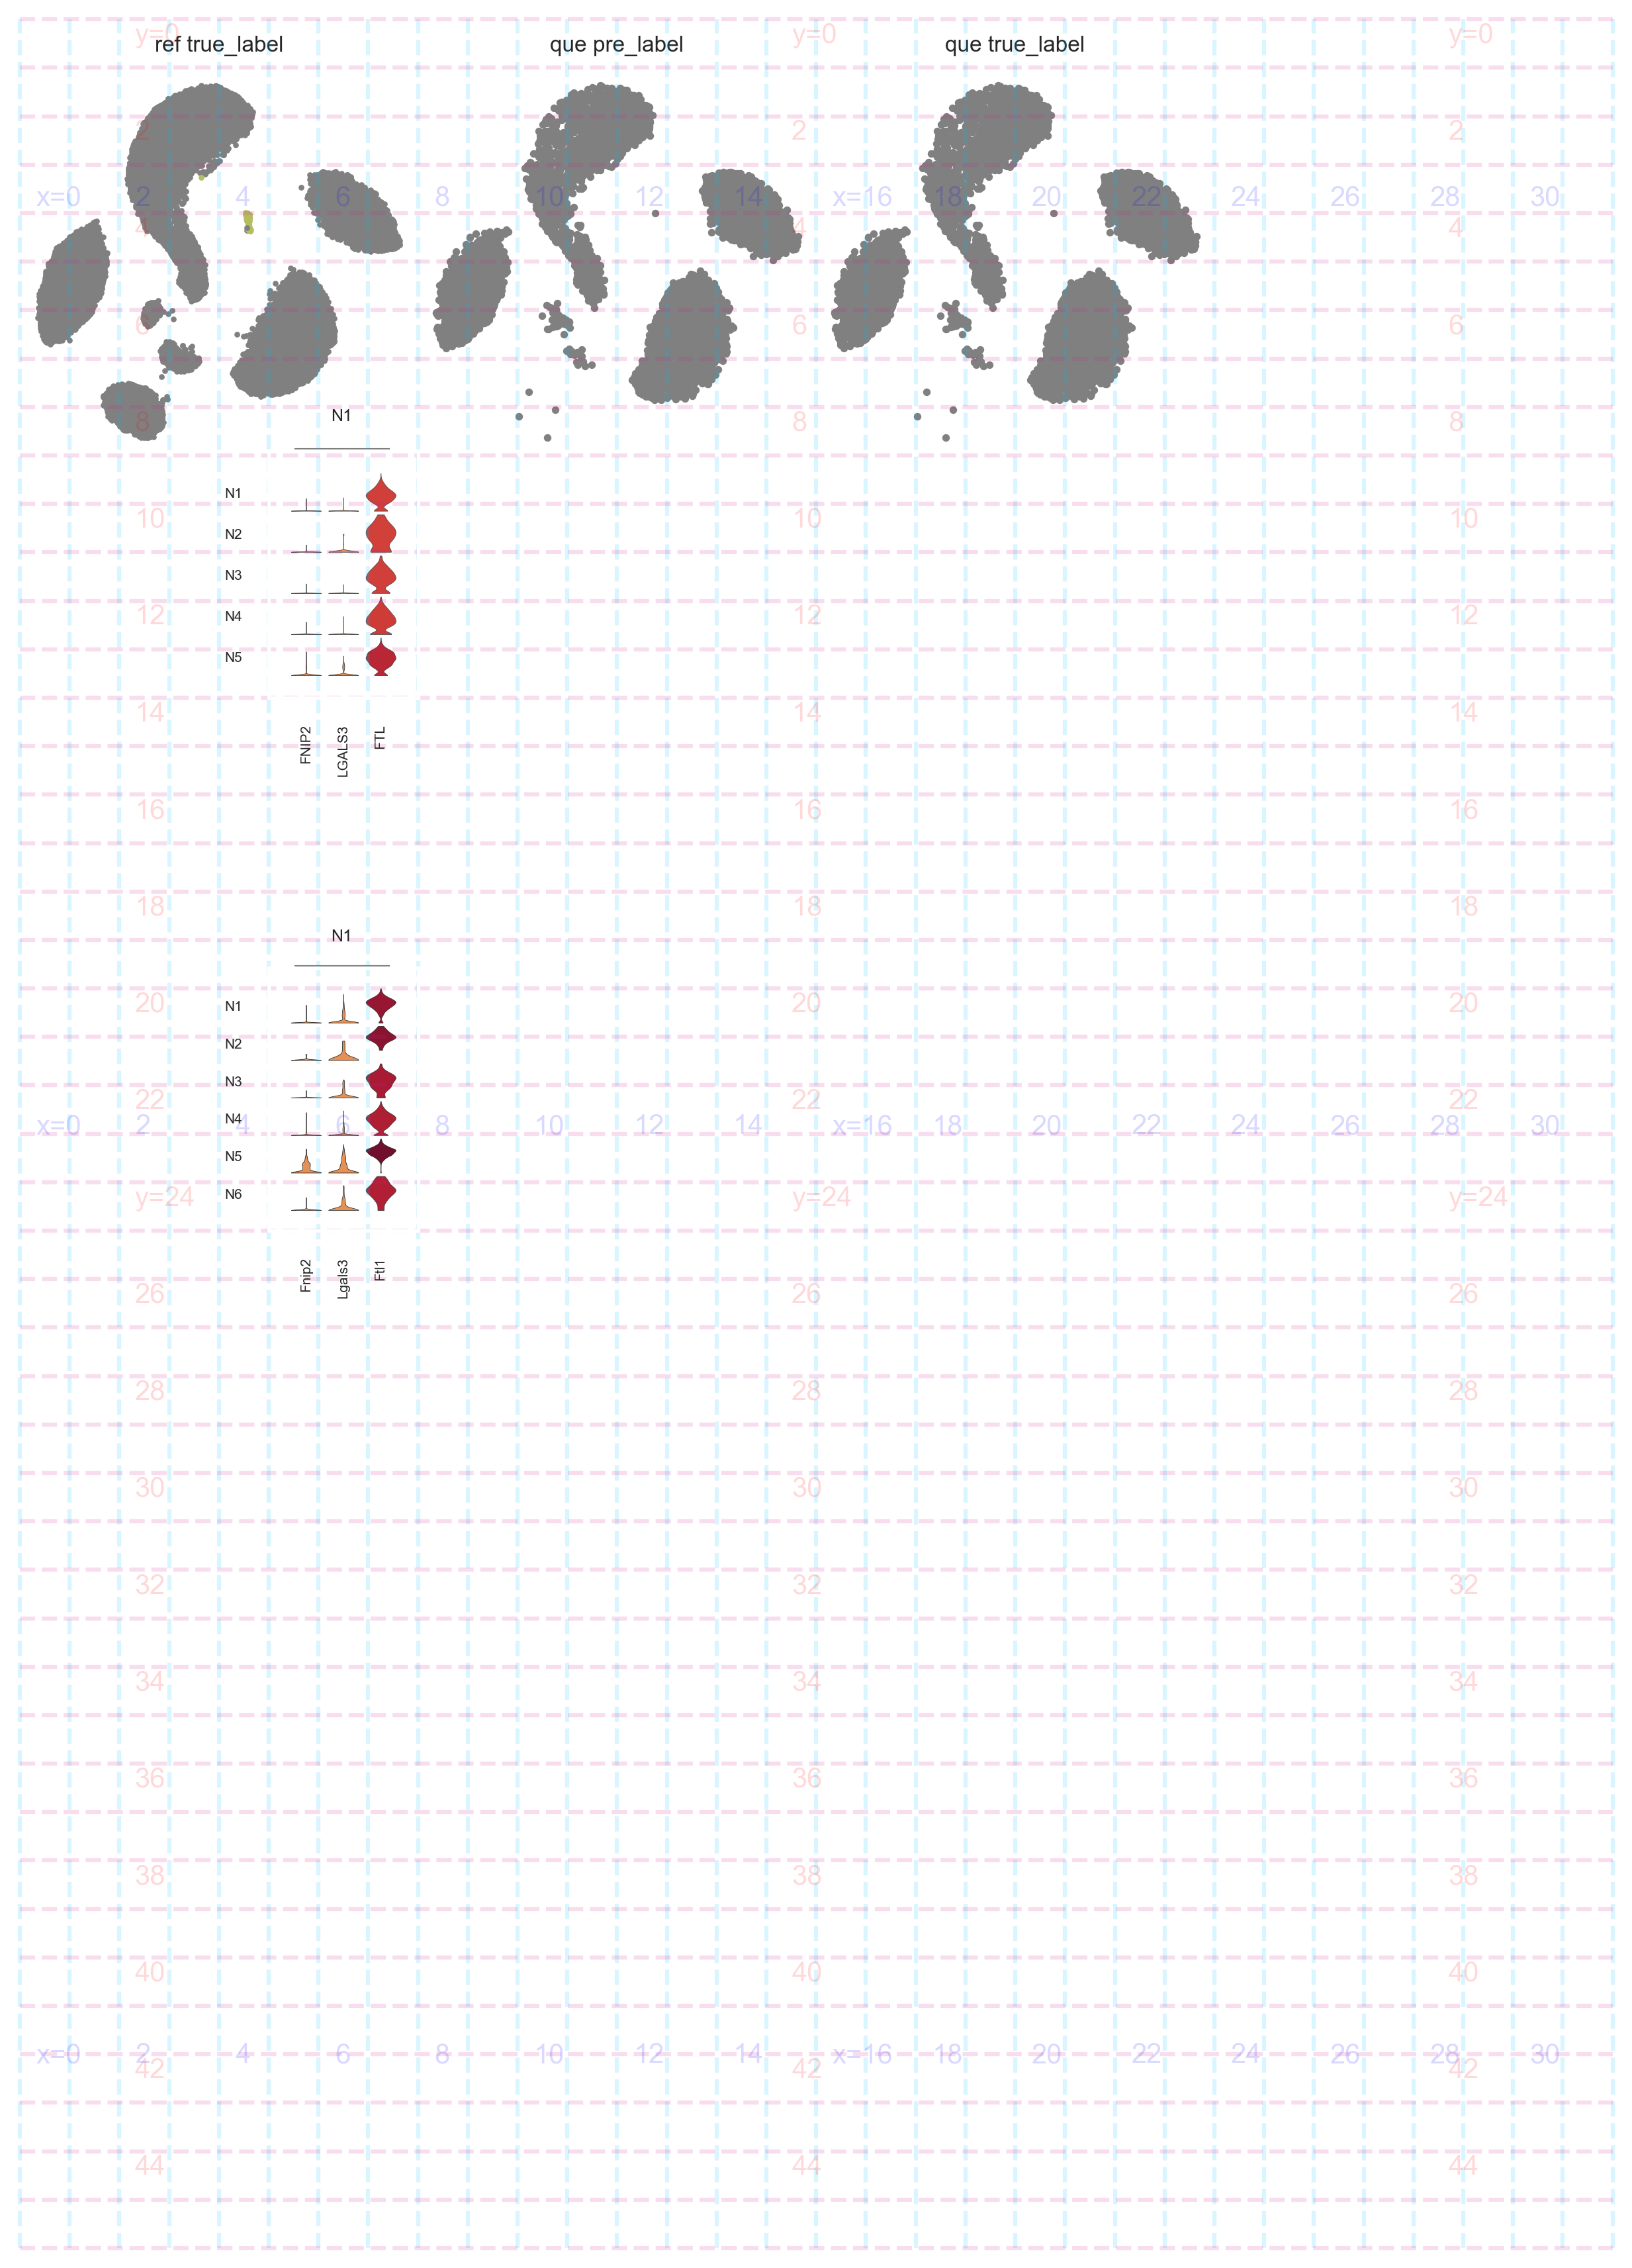

In [20]:
plt_pdf_add_grid_customer(fig)
temp_del_ax = False

if temp_del_ax:
    fig.delaxes(ax)
else:
    temp_del_ax = True

display(fig)